In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

from matplotlib.gridspec import GridSpec
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import plotly.express as px
%matplotlib inline

In [36]:
players = pd.read_csv('data_chua_chuan_hoa.csv') 

In [37]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11814 entries, 0 to 11813
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   market_value                11814 non-null  int64  
 1   age                         11814 non-null  int64  
 2   height                      11814 non-null  int64  
 3   preferred_foot              11814 non-null  int64  
 4   attacking                   11814 non-null  int64  
 5   technical                   11814 non-null  int64  
 6   tactical                    11814 non-null  int64  
 7   defending                   11814 non-null  int64  
 8   creativity                  11814 non-null  int64  
 9   saves                       11814 non-null  int64  
 10  anticipation                11814 non-null  int64  
 11  ball_distribution           11814 non-null  int64  
 12  aerial                      11814 non-null  int64  
 13  avg_score_last_12_months    118

In [38]:
neighbors = 40

## Hàm plot

In [39]:
def _plot_kmean_scatter(X, labels, gs, thres): 
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    ax = plt.subplot(gs)
    sc = ax.scatter(X[:,0], X[:,1], c=palette[labels.astype(np.int64)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):        
            txt = ax.text(xtext, ytext, str(i), fontsize=24) 
            txts.append(txt)
    plt.title('t-sne visualization for thres={:.4f}'.format(thres))

## Chuẩn hóa standard
___

In [40]:
X = players
X_std = StandardScaler().fit_transform(X) 

In [41]:
X_std

array([[ 0.41593839, -1.24030176,  1.20223572, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.10598266, -0.54710969, -0.24125356, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.24445151, -1.24030176,  0.48049108, ...,  2.09925344,
        -0.26824158, -0.82348345],
       ...,
       [-0.35203115, -0.77817371,  1.20223572, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.35842202,  0.60821042, -0.52995142, ..., -0.47635983,
        -0.26824158,  1.21435348],
       [-0.35735688, -0.77817371, -0.81864927, ...,  2.09925344,
        -0.26824158, -0.82348345]])

In [42]:
X_std

array([[ 0.41593839, -1.24030176,  1.20223572, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.10598266, -0.54710969, -0.24125356, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.24445151, -1.24030176,  0.48049108, ...,  2.09925344,
        -0.26824158, -0.82348345],
       ...,
       [-0.35203115, -0.77817371,  1.20223572, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.35842202,  0.60821042, -0.52995142, ..., -0.47635983,
        -0.26824158,  1.21435348],
       [-0.35735688, -0.77817371, -0.81864927, ...,  2.09925344,
        -0.26824158, -0.82348345]])

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

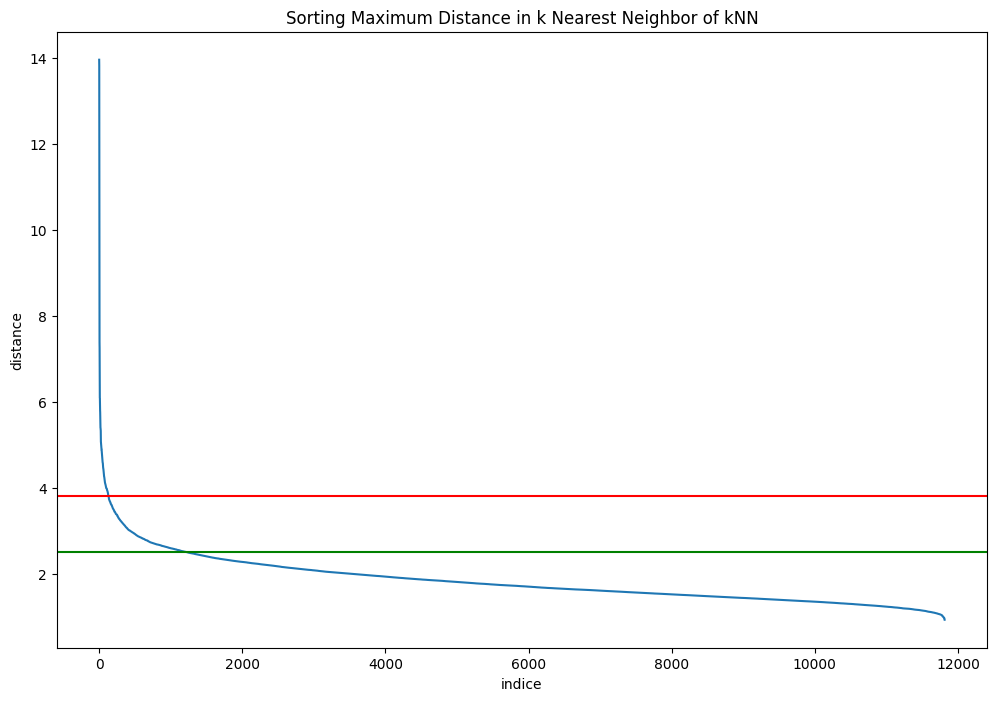

In [43]:
# X_std = X_std
# neighbors = 42
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=3.8,color='red')
# plt.text(2, 0.6, 'y = 0.7',fontsize=8,)
plt.axhline(y=2.5, color='green')
# plt.text(2, 0.5, 'y = 0.45', fontsize=8)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### PCA

5 5 5 5 4 4 4 3 3 3 3 3 

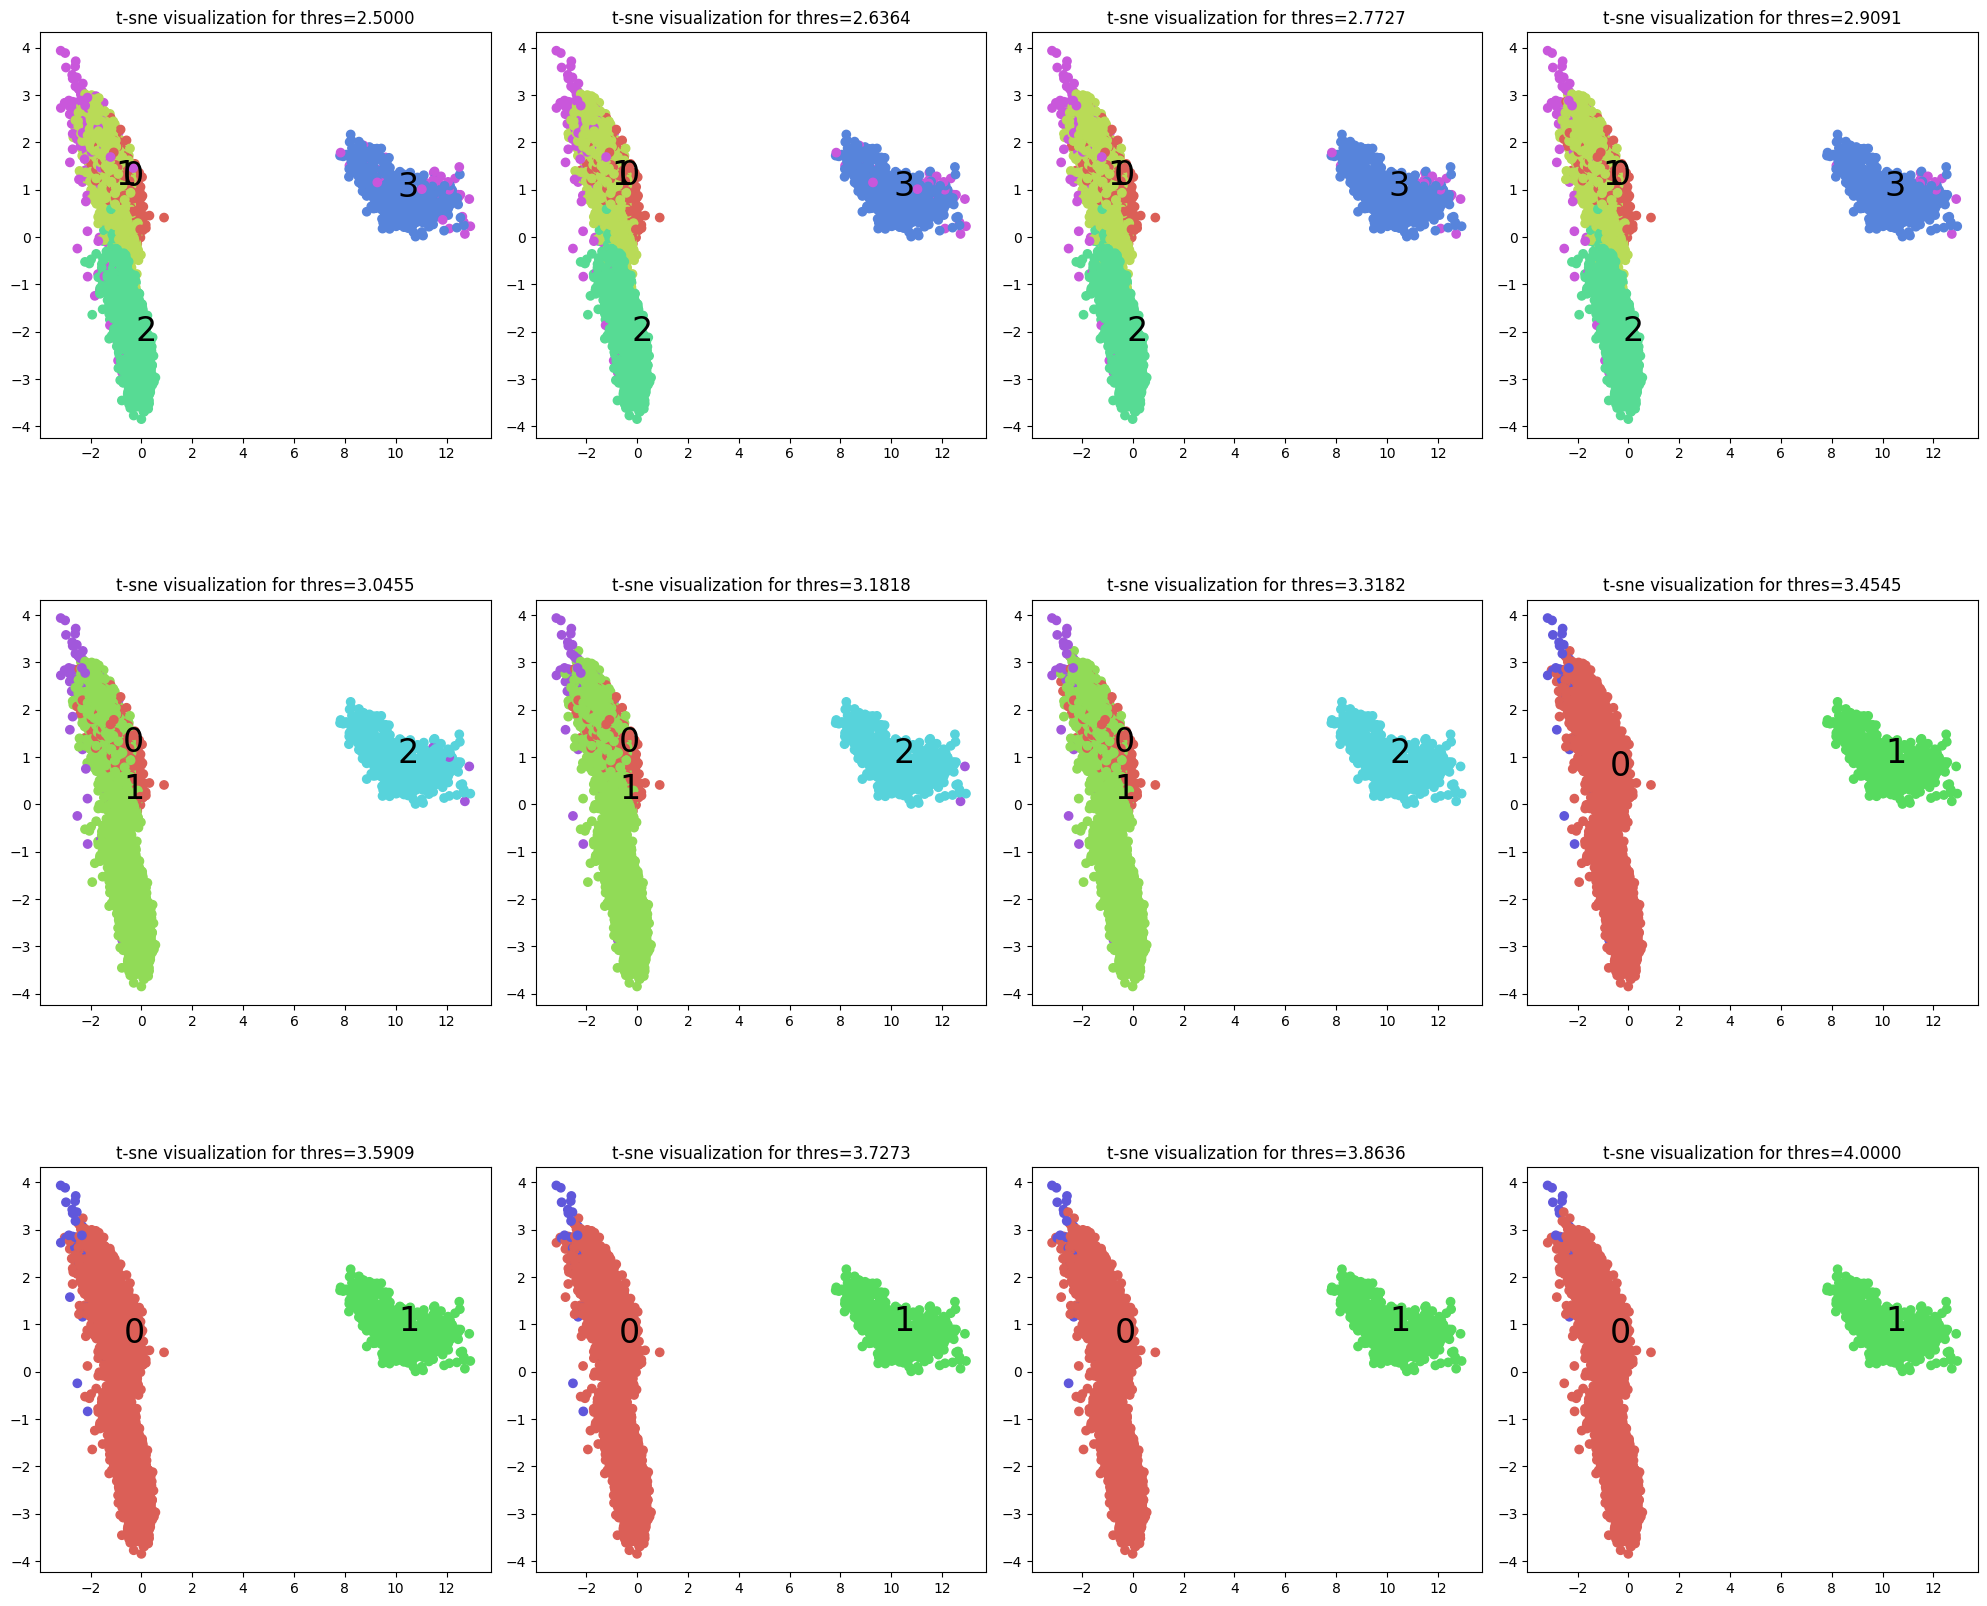

In [44]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
for i, thres in enumerate(np.linspace(2.5, 4, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    pca = PCA(n_components=2).fit_transform(X_std)   
    _plot_kmean_scatter(pca , labels, gs[i], thres) 

### T-SNE

5 5 5 5 4 4 4 3 3 3 3 3 

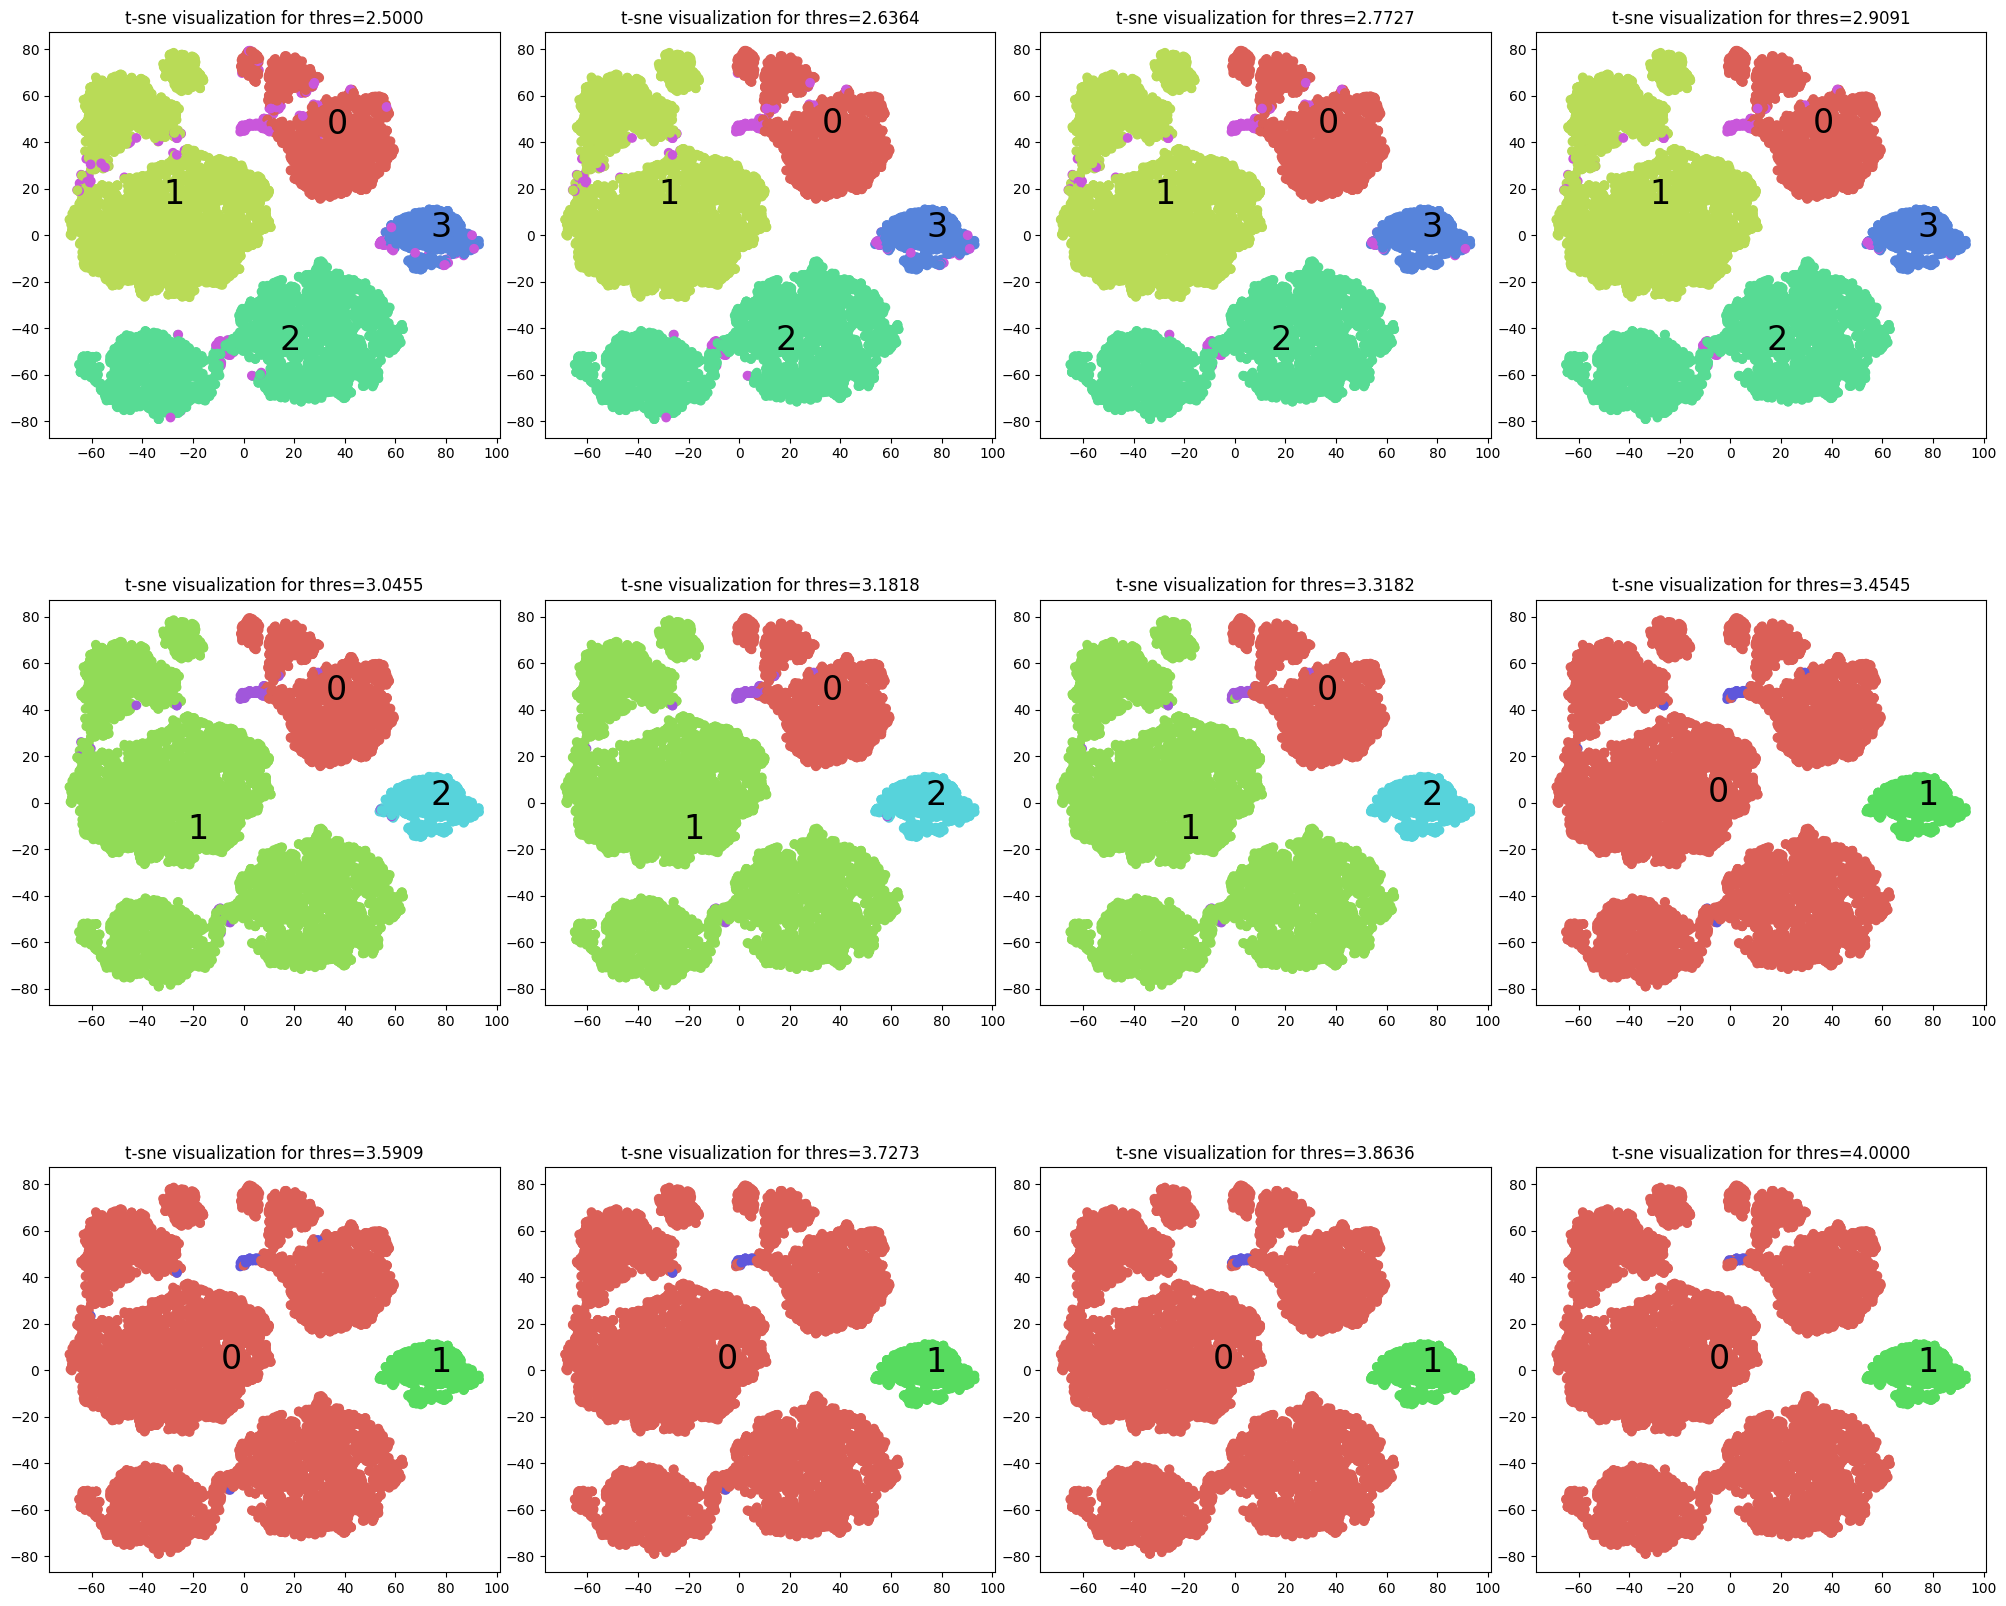

In [45]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)  
for i, thres in enumerate(np.linspace(2.5, 4, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    _plot_kmean_scatter(tsne , labels, gs[i], thres) 

## Chuẩn hóa minmax
___

In [46]:
X = players
X_std = MinMaxScaler().fit_transform(X) 

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

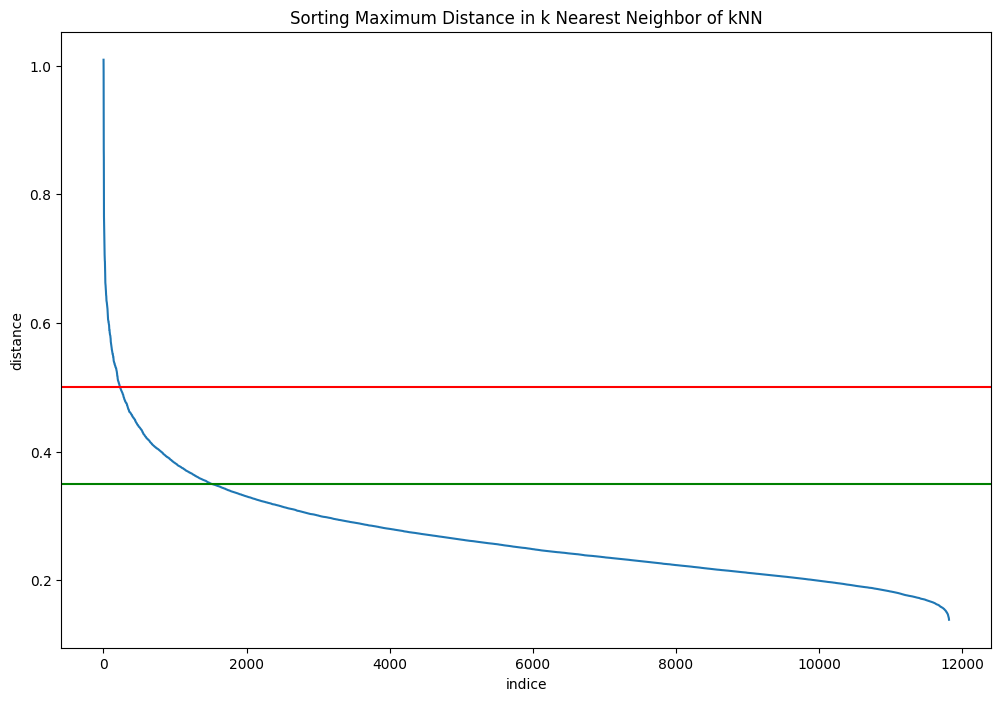

In [47]:
# X_std = X_std
# neighbors = 42
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.5,color='red')
# plt.text(2, 0.6, 'y = 0.7',fontsize=8,)
plt.axhline(y=0.35, color='green')
# plt.text(2, 0.5, 'y = 0.45', fontsize=8)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### PCA

11 11 11 12 12 12 12 12 12 12 12 12 

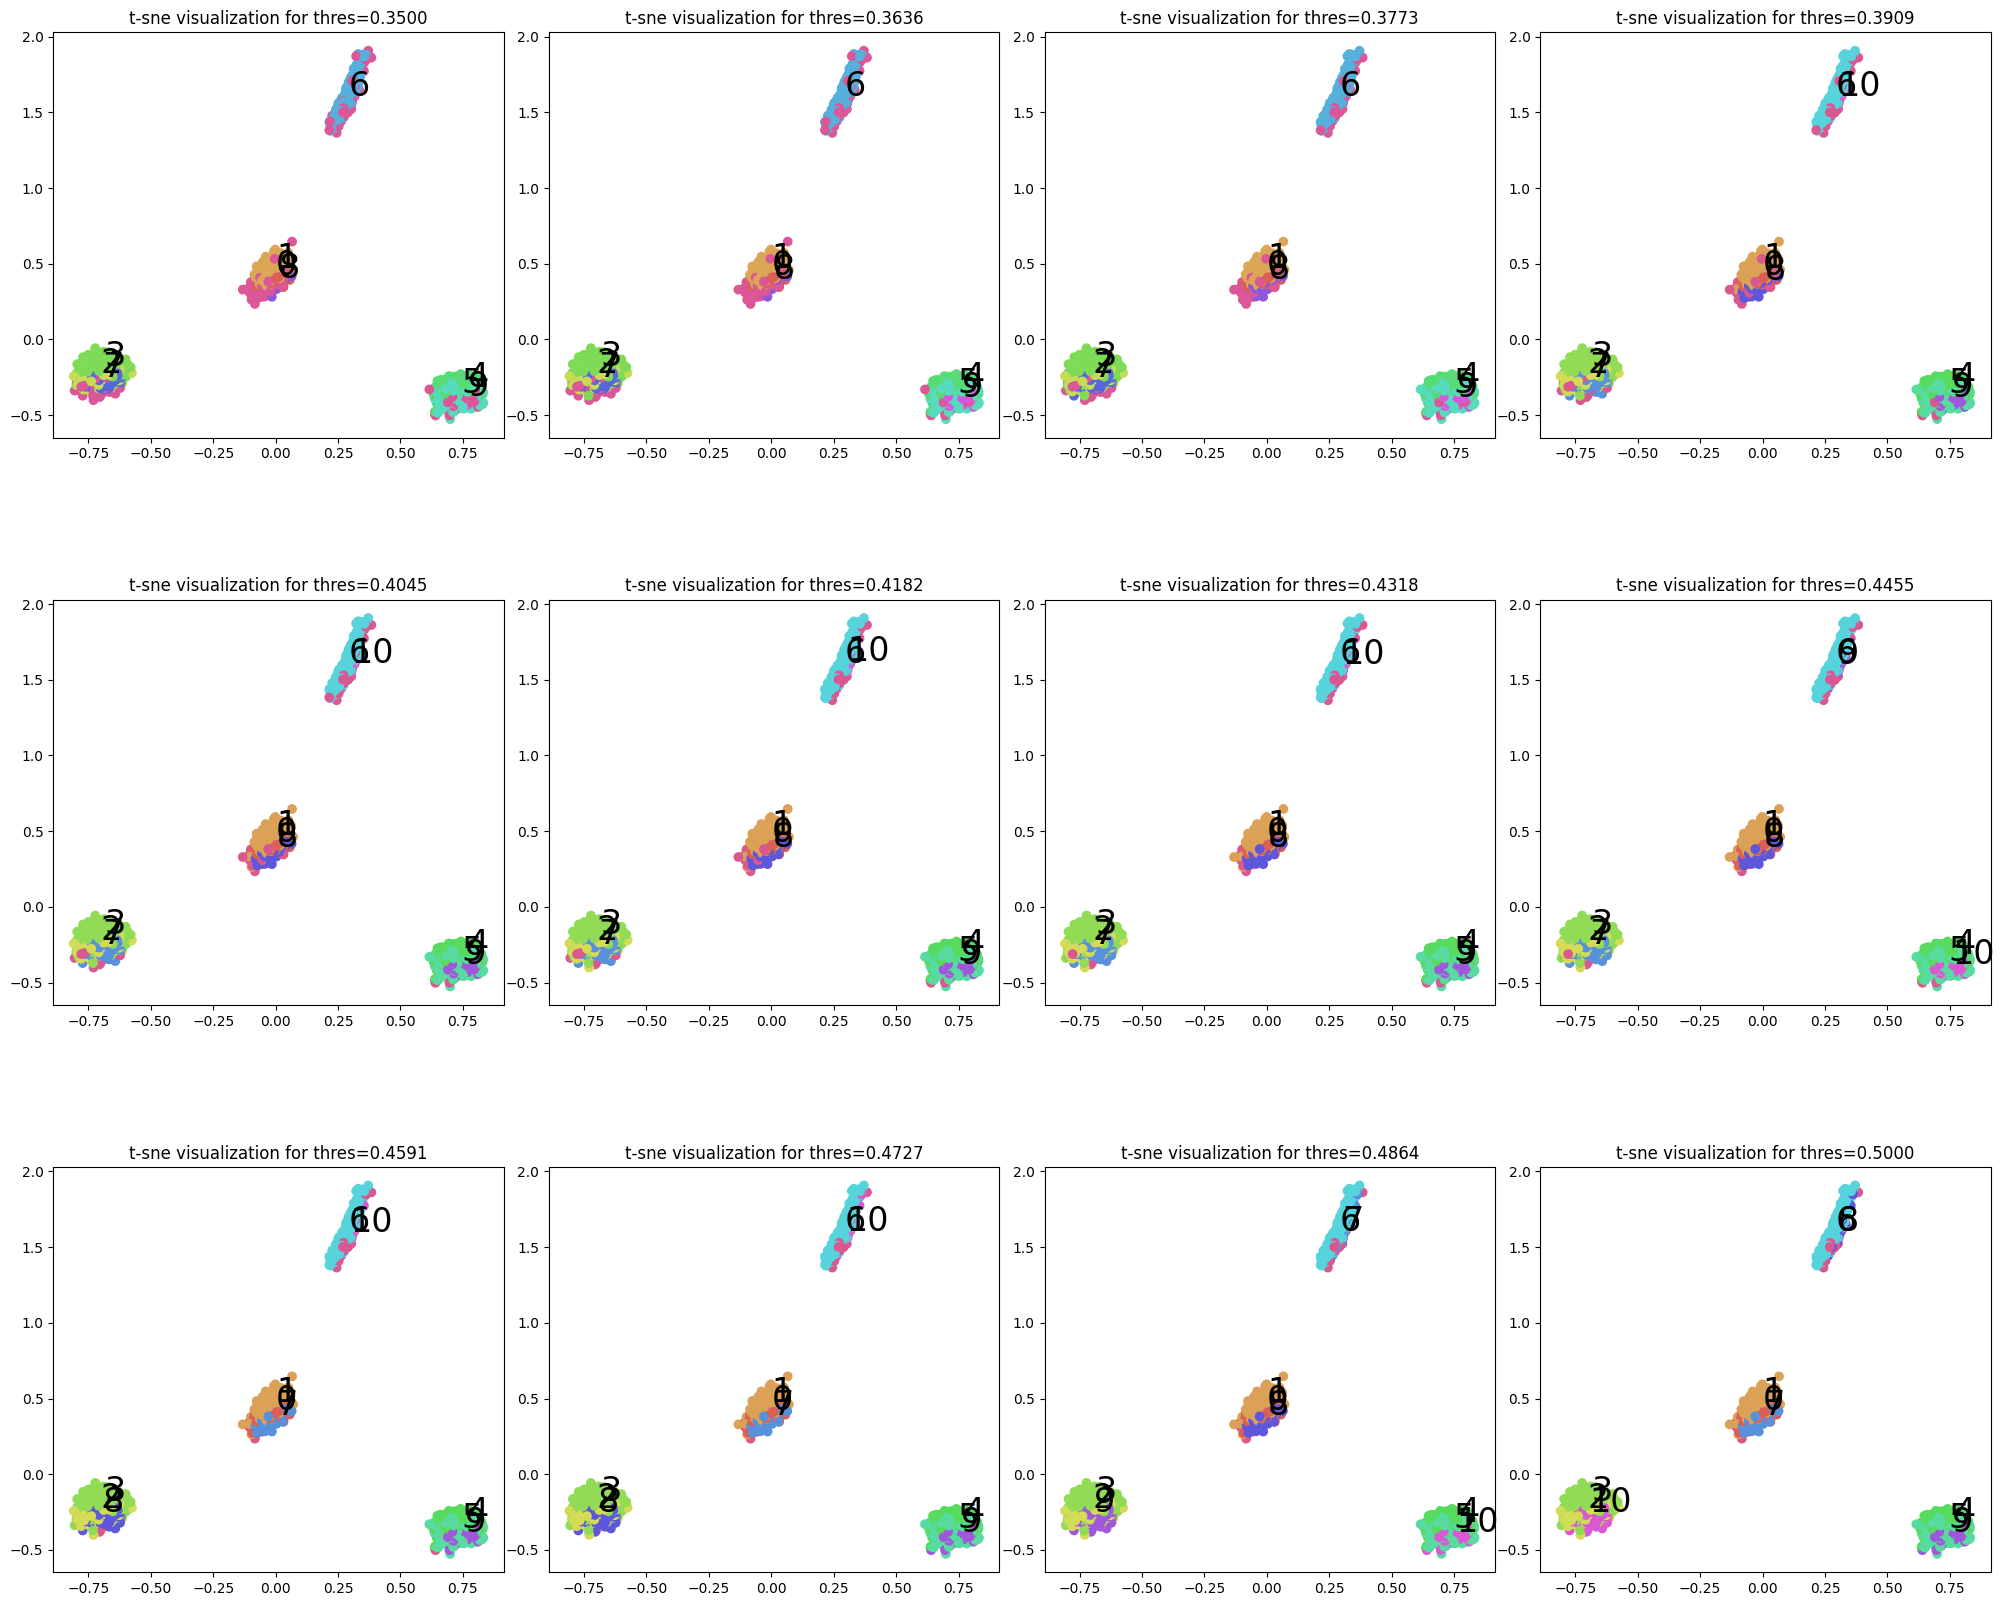

In [48]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
for i, thres in enumerate(np.linspace(0.35, 0.5, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    pca = PCA(n_components=2).fit_transform(X_std)   
    _plot_kmean_scatter(pca , labels, gs[i], thres) 

### T-SNE

11 4 4 2 1 1 1 1 1 1 1 1 

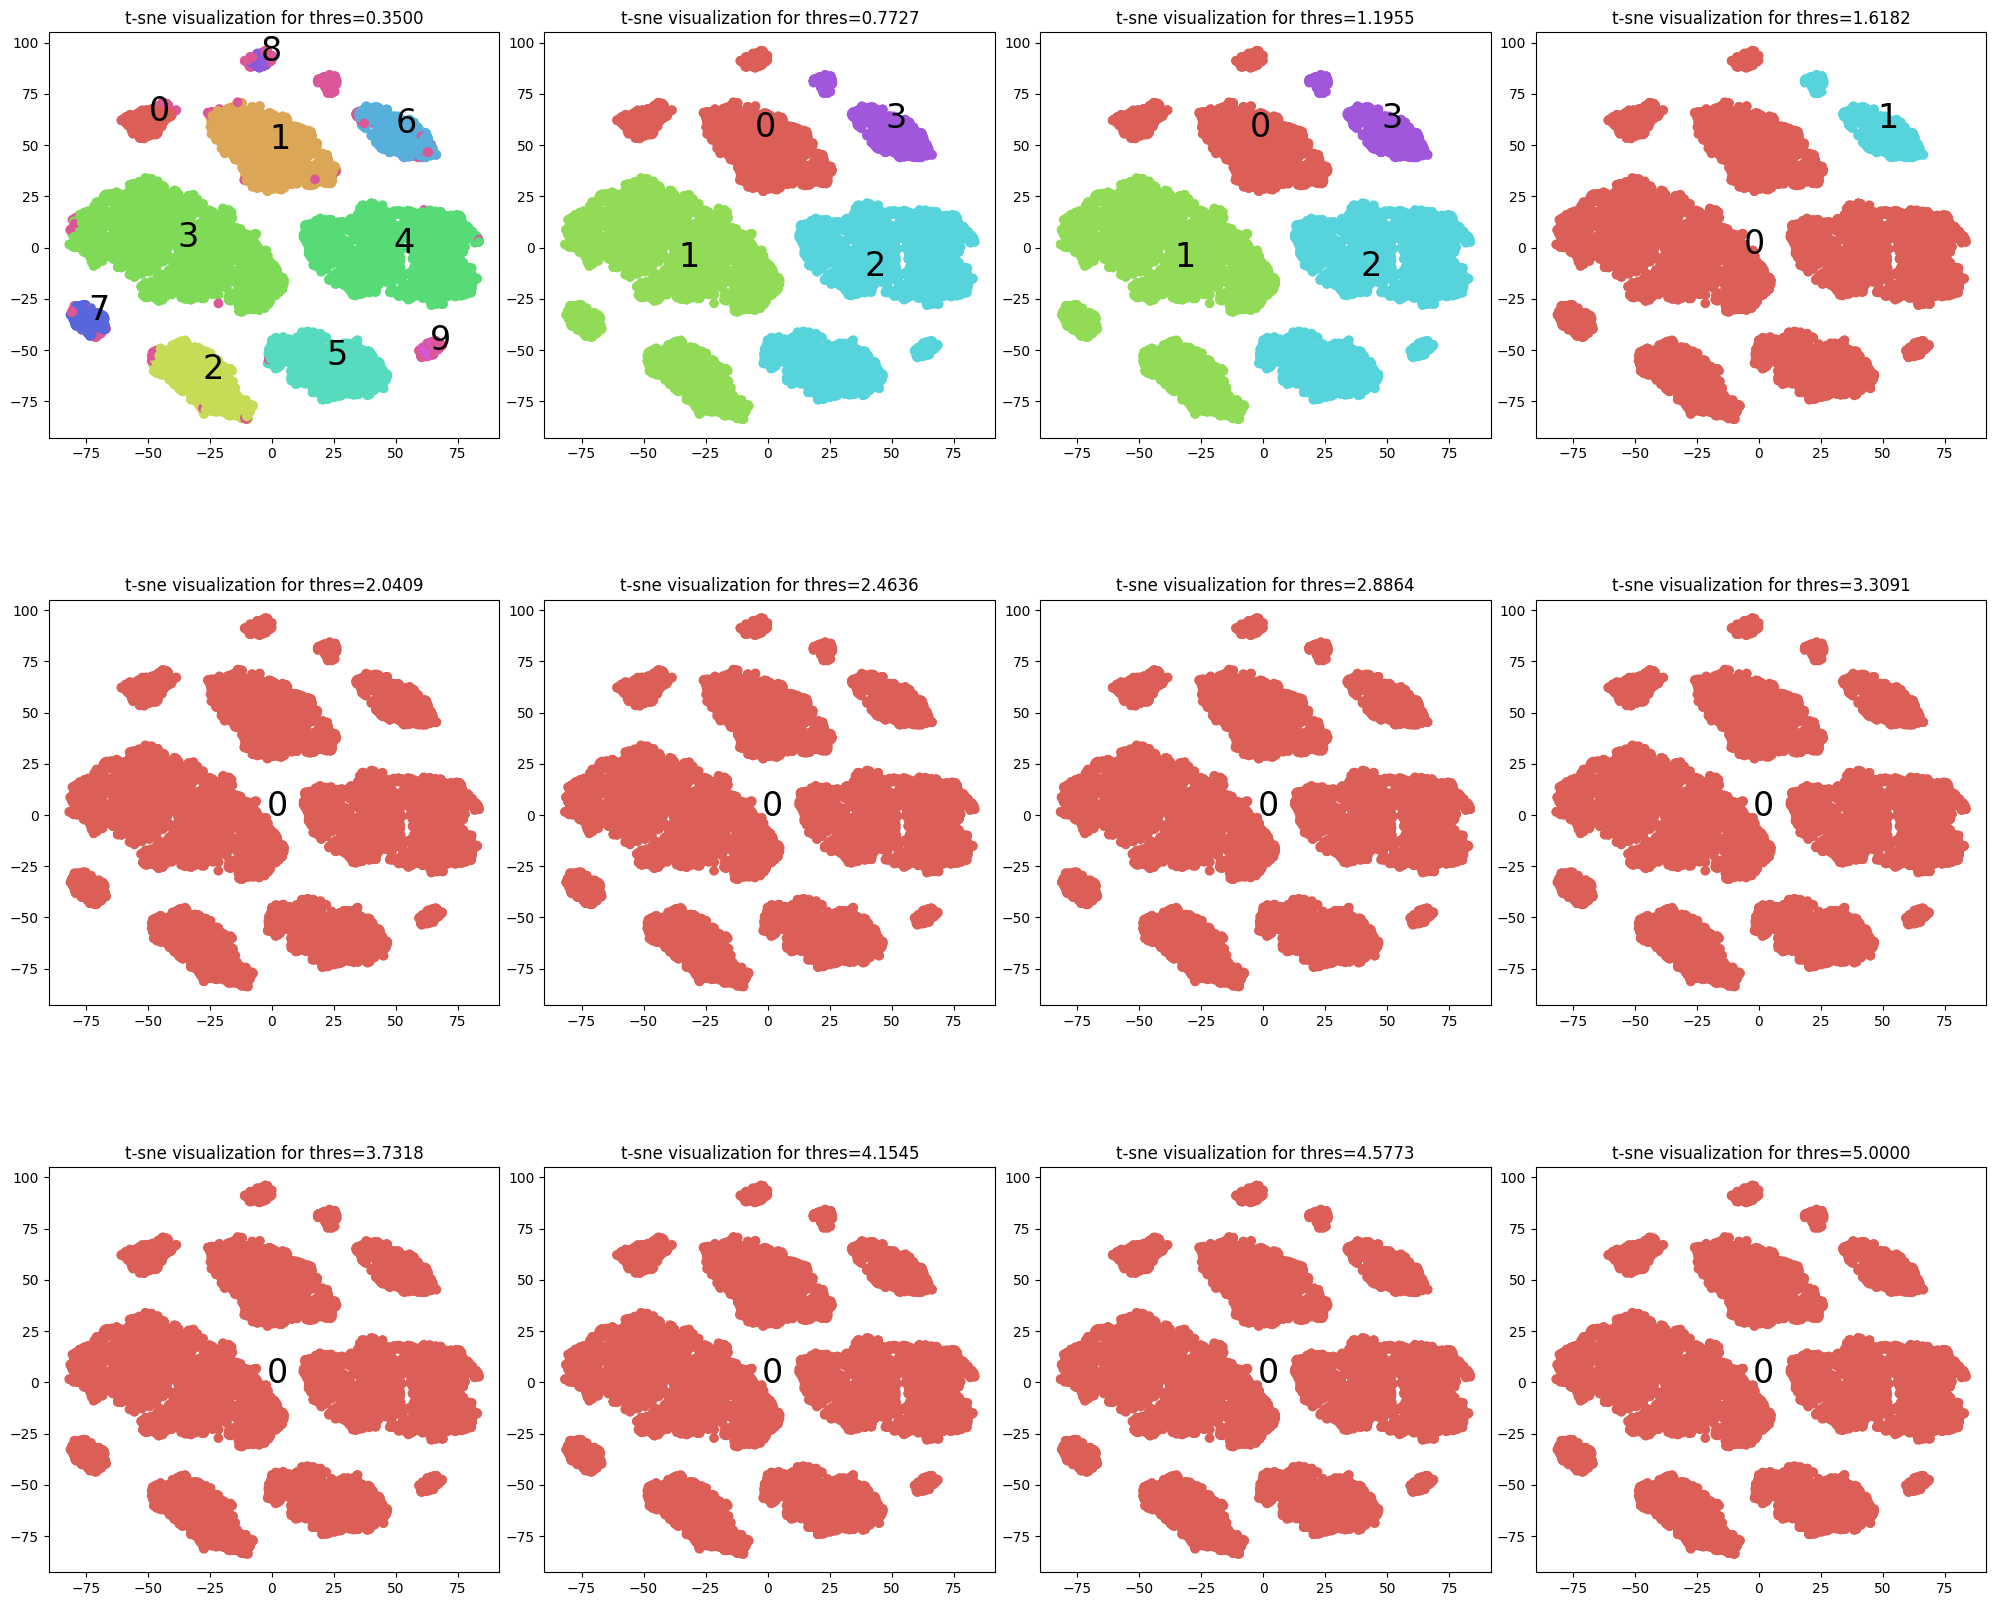

In [49]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)  
for i, thres in enumerate(np.linspace(0.35, 5, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    _plot_kmean_scatter(tsne , labels, gs[i], thres) 